In [9]:
# BIBLIOTECAS
from sympy import *
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
%matplotlib inline

# DECLARA SIMBOLOS
x, y, a1, a2, a3, Q, L, E, I = symbols('x y a1 a2 a3 Q L E I')

# CARREGAMENTO
q   = a3*x**2 + a2*x + a1
eq1 = q.subs(x,0) - Q
a1_ = solve(eq1,a1)[0]
q = q.subs(a1, a1_)
eq2 = q.subs(x,L/3) - Q/2
eq3 = q.subs(x,L)
system = [eq2, eq3]
var = [a2, a3]
sol = solve(system, var)
a2_ = sol[a2]
a3_ = sol[a3]
q = q.subs([(a2, a2_), (a3, a3_)])

# MATRIZ DE RIGIDEZ
K = E*I/L**3*Matrix([[12, 6*L, -12, 6*L], [6*L, 4*L**2, -6*L, 2*L**2], [-12, -6*L, 12, -6*L], [6*L, 2*L**2, -6*L, 4*L**2]])

# VETOR DE CARREGAMENTO
phi = Matrix([[2*x**3/L**3-3*x**2/L**2+1],[x - 2*x**2/L+x**3/L**2],[3*x**2/L**2 - 2*x**3/L**3],[x**3/L**2 - x**2/L]])
F = integrate(q*phi,(x,0,L/2))
print(F)

Matrix([[43*L*Q/160], [83*L**2*Q/2560], [7*L*Q/160], [-19*L**2*Q/1536]])


In [2]:
# ELIMINAÇÃO DE LINHAS E COLUNAS
F = F.row_del(0)
F = F.row_del(0)

K.row_del(0)
K.row_del(0)
K.col_del(0)
K.col_del(0)

Q - 7*Q*x/(4*L) + 3*Q*x**2/(4*L**2)

In [3]:
F

Matrix([
[  7*L*Q/80],
[-L**2*Q/48]])

In [10]:
F.subs({L: 1, Q: 100}).simplify()

Matrix([
[   215/8],
[ 415/128],
[    35/8],
[-475/384]])

In [4]:
K

Matrix([
[12*E*I/L**3, -6*E*I/L**2],
[-6*E*I/L**2,     4*E*I/L]])

In [5]:
u = linsolve((K, F))

In [7]:
u.subs({L: 1, Q: 100, E: 210e9, I: 100})

FiniteSet((8.92857142857143e-14, 1.09126984126984e-13))

In [3]:
# Bibliotecas
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex = True)

In [20]:
x, L, E, I, Q = symbols('x L E I Q')
f = Function('f')(x)
q = Q + 3*Q*x**2/4/L**2 - 7*Q*x/4/L

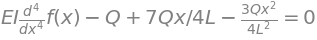

In [27]:
ics = {f.subs(x,0): 0, f.diff(x).subs(x,0): 0, f.diff(x,x).subs(x,L): 0, f.diff(x,x,x).subs(x,L): 0}
ode = Eq(E*I*f.diff(x,x,x,x)- q,0)
display(ode)

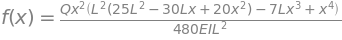

In [25]:
fsol = dsolve(ode, f, ics = ics)
fsol.simplify()

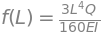

In [26]:
fsol.subs(x,L)